In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
# import libraries
import tensorflow as tf
import numpy as np

In [3]:
seed = 7
np.random.seed(seed)

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv("forestfires.csv")
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [6]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
# Perform preprocessing
label_encoder = preprocessing.LabelEncoder()
data['month'] = label_encoder.fit_transform(data['month'])
data['day'] = label_encoder.fit_transform(data['day'])
data['size_category'] = label_encoder.fit_transform(data['size_category'])
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1


In [7]:
# Split the data into features and target variable
X = data.drop(columns=['size_category'])  # Features
y = data['size_category']  # Target variable

In [8]:
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.astype(np.float32))

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [11]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Build the neural network model
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                496       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# Compile the model
model.compile(loss ='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
# Train the model
history = model.fit(X_train_scaled, y_train, validation_split=0.20, epochs=50, batch_size=100)

Epoch 1/50


4/4 [==============================] - 2s 94ms/step - loss: 4.6293 - accuracy: 0.4758 - val_loss: 3.4140 - val_accuracy: 0.5301
Epoch 2/50
4/4 [==============================] - 0s 18ms/step - loss: 4.1948 - accuracy: 0.4818 - val_loss: 3.5220 - val_accuracy: 0.5422
Epoch 3/50
4/4 [==============================] - 0s 18ms/step - loss: 3.9169 - accuracy: 0.4939 - val_loss: 3.3372 - val_accuracy: 0.5542
Epoch 4/50
4/4 [==============================] - 0s 18ms/step - loss: 3.3636 - accuracy: 0.5273 - val_loss: 3.1715 - val_accuracy: 0.6024
Epoch 5/50
4/4 [==============================] - 0s 16ms/step - loss: 3.0366 - accuracy: 0.5485 - val_loss: 2.6559 - val_accuracy: 0.6506
Epoch 6/50
4/4 [==============================] - 0s 19ms/step - loss: 2.8849 - accuracy: 0.5727 - val_loss: 2.3349 - val_accuracy: 0.6386
Epoch 7/50
4/4 [==============================] - 0s 20ms/step - loss: 2.7520 - accuracy: 0.5909 - val_loss: 2.1385 - val_accuracy: 0.6265
Epoch 8/50
4/4 [=========

In [16]:
loss = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {loss}')

4/4 [==============================] - 0s 5ms/step - loss: 1.2229 - accuracy: 0.7404
Test Loss: [1.2229056358337402, 0.7403846383094788]


In [17]:
model.history.history.keys()
import matplotlib.pyplot as plt

In [18]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

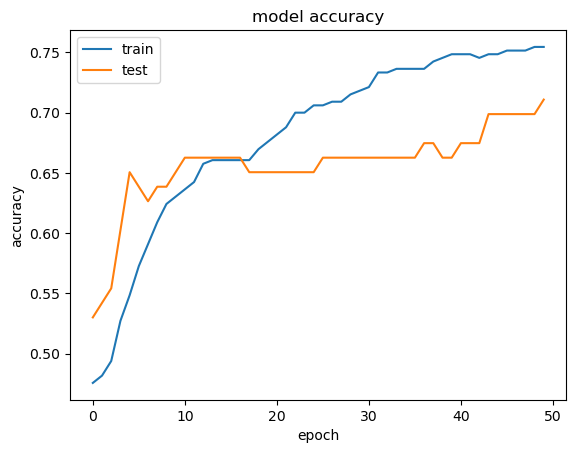

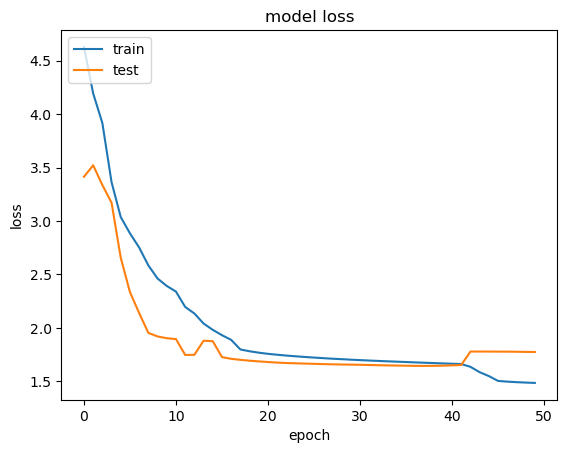

In [19]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()